In [3]:
from osgeo import gdal
from osgeo import gdal_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import numpy as np
import geopandas as gpd
%matplotlib inline

### Import the NYC Zoning shapefile into geopandas

In [9]:
path = "data/NYC_zoning_shape/nyzd.shp"
shp = gpd.GeoDataFrame.from_file(path)
print("Polygons, attributes: ",shp.shape)
shp.head(3)

('Polygons, attributes: ', (5247, 4))


,ZONEDIST,Shape_Leng,Shape_Area,geometry
0,R7A,17629.277443,1.988186e+06,"POLYGON ((1020201.76739502 185929.6968383789, ..."
1,R4-1,2575.578859,3.722454e+05,"POLYGON ((982158.9730224609 167972.6126098633,..."
2,PARK,569.651024,1.606986e+04,"POLYGON ((996439.2562255859 197691.6995849609,..."


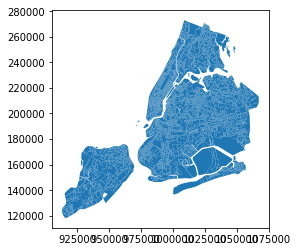

In [10]:
shp.plot()

### What are the unique zoning categories?

In [99]:
shp.ZONEDIST.value_counts().head(20)

PARK          1262
M1-1           190
R3-2           188
R5             181
R6B            172
R4             165
R4-1           161
R6A            156
R6             145
R5B            137
R3-1           118
R7A            113
R4A            105
R3X            105
C8-1           100
R3A             87
R8B             84
PLAYGROUND      81
R2              79
M3-1            69
Name: ZONEDIST, dtype: int64

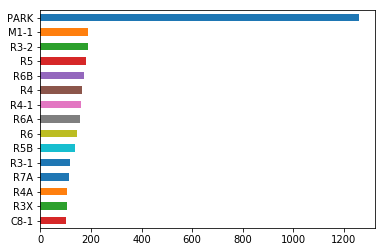

In [23]:
shp.ZONEDIST.value_counts().head(15).plot(kind='barh').invert_yaxis()

### Create a new column to categorize each area by zoning type
Initial scheme:
    * Category 1: Residential
    * Category 2: Urban non-residential
    * Category 3: Park

_Note_ We will need to refine this.

In [61]:
def make_category(zoning_cat):
    if str(zoning_cat)[:1] == "R":
        return 1
    elif str(zoning_cat)[:2] == "PA":
        return 2
    else:
        return 3

In [94]:
shp['cat']=shp['ZONEDIST'].apply(make_category)
shp.head(6)

,ZONEDIST,Shape_Leng,Shape_Area,geometry,cat
0,R7A,17629.277443,1.988186e+06,"POLYGON ((1020201.76739502 185929.6968383789, ...",1
1,R4-1,2575.578859,3.722454e+05,"POLYGON ((982158.9730224609 167972.6126098633,...",1
2,PARK,569.651024,1.606986e+04,"POLYGON ((996439.2562255859 197691.6995849609,...",2
3,PARK,719.458303,2.017799e+04,"POLYGON ((988123.0001831055 179762.2319946289,...",2
4,M1-1,2499.135173,2.055248e+05,"POLYGON ((986504.6182250977 185906.3359985352,...",3
5,C4-4D,1147.584865,7.561831e+04,"POLYGON ((1013388.582397461 184273.5696411133,...",3


### Show a map for each zoning class

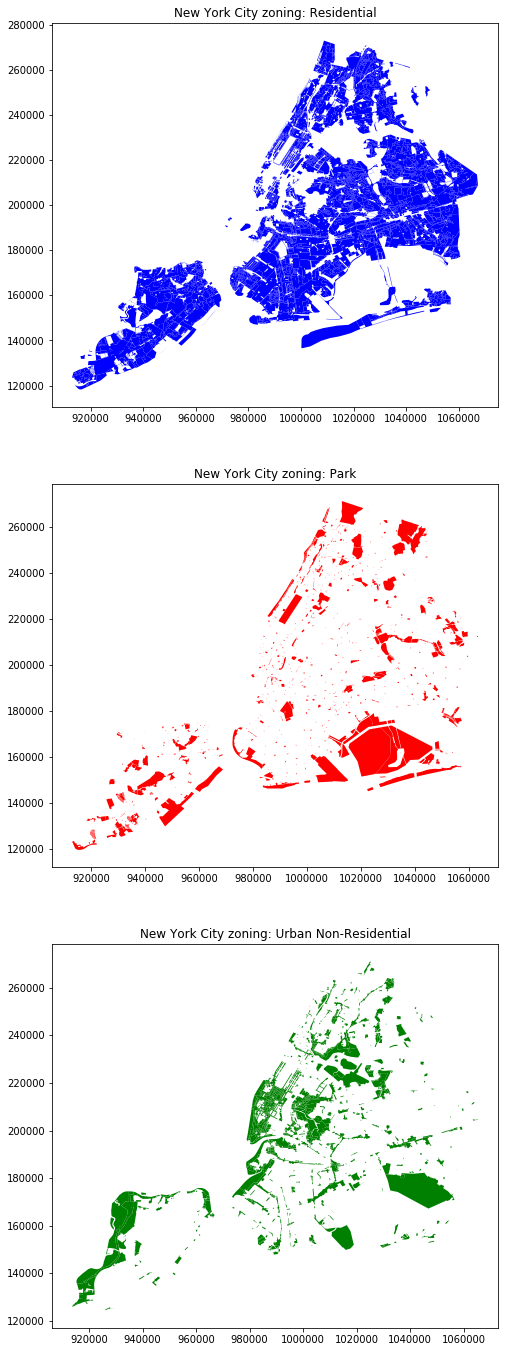

In [93]:
titles = ["Residential","Park","Urban Non-Residential"]
cols = ['blue','red','green']

fig = plt.figure(figsize=[8,24])
for i in range(3):
    ax = plt.subplot(3,1,i+1)
    shp[shp.cat == i+1].plot(ax = ax,color=cols[i])
    ax.set_title("New York City zoning: "+ titles[i])
    

### Notes and next steps
* This under-represents the extent of residential areas in NYC, because it includes mixed use zoning as non-residential. Even where it just means you have a lot of shops on ground level and apartments above. Refine the classification scheme? Can just update the function.
* I can't find a simple table of what the NY zoning codes mean. Should be on DCP website somewhere.
* Doing the same thing for Phoenix or somewhere would work better. NYC is such a mixed use city. Newer US cities are much more strictly zoned and land uses are separated out more, so in Phoenix you would have residential areas (very distinct), then shopping malls (big and distinct), then manufacturing areas. Here it's all hipster artisanal workshops mixed with flats and offices. So yeah, same approach in Phoenix will give a cleaner target variable for machine learning.
* If we can rasterize this and overlay it on the satellite image, that's our X and Y.

Reference for training data on land use types that the Vietnam article used: https://ars.els-cdn.com/content/image/1-s2.0-S2352728517300842-gr3_lrg.jpg